# Demo No. 6 - Single System 

This particular tutorial will introduce a `SingleSystem` class dedicated to modelling of single star systems with surface features such as spots and pulsations. The syntax is very similar to binary system where we initially import necessary object classes: 

In [5]:
import numpy as np

from astropy import units as u

from elisa import SingleSystem
from elisa import Star

from elisa import Observer
from elisa import (
    const as c,
    units as eu
)

After that we can define our star and parameters of the single star system. Lets take a solar model as an example:

In [6]:
star = Star(
    mass=1.0*u.solMass,
    t_eff=5772*u.K,
    gravity_darkening=0.32,
    polar_log_g=4.43775*u.dex(u.cm/u.s**2),
    metallicity=0.0,
    discretization_factor=2
)

system = SingleSystem(
    star=star,
    gamma=0*u.km/u.s,
    inclination=90*u.deg,
    rotation_period=25.380*u.d,
    reference_time=0.0*u.d
)

2021-04-01 09:20:42,099 - 32483 - single_system.system - INFO: initialising object SingleSystem


As usual, we can acces dependent and independent atributes after system initialization.

Example of `Star` attributes used in `SingleSystem`:

In [12]:
print(
    f'mass = {system.star.mass * eu.MASS_UNIT:.3}, \n'
    f'surface_potential = {system.star.surface_potential:.3}, \n'
    f'critical_potential = {system.star.critical_surface_potential:.3}' 
)

mass = 1.99e+30 kg, 
surface_potential = -1.91e+11, 
critical_potential = -7.87e+09, 
polar_radius = 6.96e+08 m, 



Additionally, all significant radii of the star can be accessed:

In [15]:
print(
    f'polar radius = {system.star.polar_radius * eu.DISTANCE_UNIT:.3}, \n'
    f'equatorial radius = {system.star.equatorial_radius * eu.DISTANCE_UNIT:.3}, \n' 
    f'equivalent radius = {system.star.equivalent_radius * eu.DISTANCE_UNIT:.3}, \n' 
)

polar radius = 6.96e+08 m, 
equatorial radius = 6.96e+08 m, 
equivalent radius = 6.96e+08 m, 



Here are some attributes of the `SingleSystem` instance:

In [4]:
print(
    f'inclination = {system.inclination * eu.ARC_UNIT:.3}, \n'
    f'phase_shift = {system.phase_shift:.3}, \n'  # rotational phase at `reference_time` 
    f'angular_velocity = {system.angular_velocity * eu.ANGULAR_FREQUENCY_UNIT:.3}'
)

inclination = 1.57 rad, 
phase_shift = 0.0, 
angular_velocity = 2.87e-06 rad / s


##  Initializing a SingleSystem from dict/json object

Instances of a `SingleSystem` can be also initialized using a dictionary of parameters that can be stored in a json format. This approach enables to define a system using different combination of parameters. Currently, the `standard` and `radius` format are available. Function `SingleSystem.from_json(dict)` is used to initialize the system instance from the combination of parameters:

In [17]:
standard_params = {
    "system": {
        "inclination": 90.0,
        "rotation_period": 10.1,
        "gamma": 10000,
        "reference_time": 0.5,
        "phase_shift": 0.0
    },
    "star": {
        "mass": 1.0,
        "t_eff": 5772.0,
        "gravity_darkening": 0.32,
        "discretization_factor": 5,
        "metallicity": 0.0,
        "polar_log_g": "4.43775 dex(cm.s-2)"   # you can also use logarithmic units using json/dict input
    }
}

standard_single = SingleSystem.from_json(standard_params)

2021-04-01 10:31:39,901 - 32483 - single_system.system - INFO: initialising object SingleSystem


`standard` and `radius` parameter format differ from each other by a manner in which the size of the star is defined. `standard` format requires a logarithm of a polar surface gravity `polar_log_g` whereas the `radius` format uses a `equivalent_radius`:

In [19]:
radius_params = {
    "system": {
        "inclination": 90.0,
        "rotation_period": 10.1,
        "gamma": 10000,
        "reference_time": 0.5,
        "phase_shift": 0.0
    },
    "star": {
        "mass": 1.0,
        "t_eff": 5772.0,
        "gravity_darkening": 0.32,
        "discretization_factor": 5,
        "metallicity": 0.0,
        "equivalent_radius": "1 solRad"   
    }
}

radius_single = SingleSystem.from_json(radius_params)

2021-04-01 10:52:33,394 - 32483 - single_system.system - INFO: initialising object SingleSystem


## Synthetic observations

Spots and pulsation are implemented into the `SingleStar` system exactly as in case of `BinarySystem` (see the corresponding tutorials). Approach to light curve calculation is also the same. As an example we can examine a value of a solar constant using our solar model (warning is caused by the usage of `bolometric` "passband"):

2021-04-01 09:44:51,564 - 32483 - observer.observer - INFO: initialising Observer instance
2021-04-01 09:44:51,578 - 32483 - observer.observer - INFO: observation is running
2021-04-01 09:44:51,600 - 32483 - single_system.surface.mesh - INFO: evaluating spots
2021-04-01 09:44:51,603 - 32483 - single_system.surface.mesh - INFO: no spots to evaluate
2021-04-01 09:44:51,913 - 32483 - observer.observer - INFO: observation finished


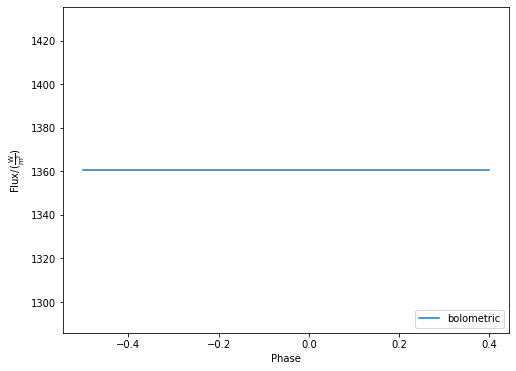

In [16]:
o = Observer(
    passband=['bolometric'],
    system=system
)

phases, curves = o.lc(
    from_phase=-0.5,
    to_phase=0.5,
    phase_step=0.1,
)

# recalculating to flux at distance 1 AU
for filter, flux in curves.items():
    flux *= 1.0 / (np.power(c.AU, 2))

o.plot.phase_curve(
    phases=phases,
    fluxes=curves,
    unit=u.W / u.m ** 2
)

Accesing surface geometry and other related parameters such as temperature, surface gravity acceleration, etc. is identical as demonstrated in binary system tutorials since all these attributes are stored in class `Star` which is used by both system types.